In [108]:
import pandas as pd

In [165]:
df= pd.read_excel('rfm.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32635 entries, 0 to 32634
Data columns (total 4 columns):
cust_name         32635 non-null object
apply_time        32635 non-null datetime64[ns]
decision_money    32635 non-null float64
status            32635 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1020.0+ KB


In [110]:
df.head()

,cust_name,apply_time,decision_money,status
0,谢文杰,2017-06-09 15:24:30,7000.0,成功
1,黄家富,2017-06-10 21:59:17,4000.0,成功
2,何文霄,2017-06-12 08:12:20,3000.0,成功
3,翟晓纯,2017-06-13 10:29:07,16000.0,成功
4,温小婷,2017-06-13 13:45:02,14000.0,成功


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32635 entries, 0 to 32634
Data columns (total 4 columns):
cust_name         32635 non-null object
apply_time        32635 non-null datetime64[ns]
decision_money    32635 non-null float64
status            32635 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1020.0+ KB


###### 数据清洗

In [112]:
df=df.loc[df['status']== '成功',:]
print('剩余：%d行' % len(df))

剩余：27253行


###### R值计算 最近一次的消费距离现在的时间

In [113]:
r=df.groupby('cust_name')['apply_time'].max().reset_index()
r.head()

,cust_name,apply_time
0,丁世奇,2018-05-21 15:56:04
1,丁中,2018-06-04 11:02:25
2,丁丹丹,2018-06-05 16:19:20
3,丁丽,2018-05-28 21:56:22
4,丁丽丽,2018-05-29 12:04:38


In [114]:
r['R']=(pd.to_datetime('2019-12-12')-r['apply_time']).dt.days
r=r[['cust_name','R']]
r.head()

,cust_name,R
0,丁世奇,569
1,丁中,555
2,丁丹丹,554
3,丁丽,562
4,丁丽丽,561


###### F值计算  消费频次

In [115]:
df['date_time']=df['apply_time'].astype(str).str[:10]
df.head()

,cust_name,apply_time,decision_money,status,date_time
0,谢文杰,2017-06-09 15:24:30,7000.0,成功,2017-06-09
1,黄家富,2017-06-10 21:59:17,4000.0,成功,2017-06-10
2,何文霄,2017-06-12 08:12:20,3000.0,成功,2017-06-12
3,翟晓纯,2017-06-13 10:29:07,16000.0,成功,2017-06-13
4,温小婷,2017-06-13 13:45:02,14000.0,成功,2017-06-13


In [116]:
dup_f=df.groupby(['cust_name','date_time'])['status'].count().reset_index()
dup_f.head()

,cust_name,date_time,status
0,丁世奇,2018-05-21,1
1,丁中,2018-06-04,1
2,丁丹丹,2018-05-30,1
3,丁丹丹,2018-06-05,1
4,丁丽,2018-05-28,1


In [117]:
f=dup_f.groupby(['cust_name'])['date_time'].count().reset_index()
f.columns=['cust_mane','F']
f.head()

,cust_mane,F
0,丁世奇,1
1,丁中,1
2,丁丹丹,2
3,丁丽,1
4,丁丽丽,1


###### M值计算  消费金额

In [118]:
sum_m=df.groupby(['cust_name'])['decision_money'].sum().reset_index()
sum_m.columns=['cust_name','total_moner']
sum_m.head()

,cust_name,total_moner
0,丁世奇,2000.0
1,丁中,5000.0
2,丁丹丹,8500.0
3,丁丽,5000.0
4,丁丽丽,5000.0


###### 合并

In [119]:
com_m=pd.merge(sum_m,f, on=sum_m['cust_name'], how='inner')
com_m.head() 

,key_0,cust_name,total_moner,cust_mane,F
0,丁世奇,丁世奇,2000.0,丁世奇,1
1,丁中,丁中,5000.0,丁中,1
2,丁丹丹,丁丹丹,8500.0,丁丹丹,2
3,丁丽,丁丽,5000.0,丁丽,1
4,丁丽丽,丁丽丽,5000.0,丁丽丽,1


In [120]:

com_m['M']=com_m['total_moner']/com_m['F']
com_m.head()

,key_0,cust_name,total_moner,cust_mane,F,M
0,丁世奇,丁世奇,2000.0,丁世奇,1,2000.0
1,丁中,丁中,5000.0,丁中,1,5000.0
2,丁丹丹,丁丹丹,8500.0,丁丹丹,2,4250.0
3,丁丽,丁丽,5000.0,丁丽,1,5000.0
4,丁丽丽,丁丽丽,5000.0,丁丽丽,1,5000.0


In [121]:
rfm=pd.merge(r,com_m,on='cust_name',how='inner')
rfm.head()

,cust_name,R,key_0,total_moner,cust_mane,F,M
0,丁世奇,569,丁世奇,2000.0,丁世奇,1,2000.0
1,丁中,555,丁中,5000.0,丁中,1,5000.0
2,丁丹丹,554,丁丹丹,8500.0,丁丹丹,2,4250.0
3,丁丽,562,丁丽,5000.0,丁丽,1,5000.0
4,丁丽丽,561,丁丽丽,5000.0,丁丽丽,1,5000.0


In [122]:
rfm.drop(columns=['key_0','cust_name'],inplace=True)
rfm.head()

,R,total_moner,cust_mane,F,M
0,569,2000.0,丁世奇,1,2000.0
1,555,5000.0,丁中,1,5000.0
2,554,8500.0,丁丹丹,2,4250.0
3,562,5000.0,丁丽,1,5000.0
4,561,5000.0,丁丽丽,1,5000.0


##### 给每个消费者的R/F/M值打分，
##### 例如R代表了用户有多少天没来下单，这个值越大，用户流失的可能性越大，所以R越大，分值越小。
##### F值代表了用户购买频次，M值则是用户平均支付金额，这两个指标是越大越好，即数值越大，得分越高。


In [123]:
rfm['r_score']=pd.cut(rfm['R'],bins=[0,30,90,120,900],labels=[5,4,3,2],right=False).astype(float)
rfm['f_score']=pd.cut(rfm['F'],bins=[0,3,9,12,15],labels=[2,3,4,5],right=False).astype(float)
rfm['m_score']=pd.cut(rfm['M'],bins=[0,30,90,120,100000],labels=[2,3,4,5],right=False).astype(float)

In [124]:
rfm.describe()

,R,total_moner,F,M,r_score,f_score,m_score
count,22451.000000,22451.000000,22451.000000,22451.000000,22428.0,22450.000000,22450.000000
mean,544.930827,6679.455484,1.184045,5601.550759,2.0,2.034477,4.990780
std,43.558955,8934.722748,0.713270,6622.056374,0.0,0.196784,0.115426
min,278.000000,1.000000,1.000000,1.000000,2.0,2.000000,2.000000
25%,517.000000,2000.000000,1.000000,2000.000000,2.0,2.000000,5.000000
50%,553.000000,5000.000000,1.000000,5000.000000,2.0,2.000000,5.000000
75%,559.000000,6000.000000,1.000000,5000.000000,2.0,2.000000,5.000000
max,914.000000,168000.000000,15.000000,100000.000000,2.0,5.000000,5.000000


In [125]:
rfm.head()

,R,total_moner,cust_mane,F,M,r_score,f_score,m_score
0,569,2000.0,丁世奇,1,2000.0,2.0,2.0,5.0
1,555,5000.0,丁中,1,5000.0,2.0,2.0,5.0
2,554,8500.0,丁丹丹,2,4250.0,2.0,2.0,5.0
3,562,5000.0,丁丽,1,5000.0,2.0,2.0,5.0
4,561,5000.0,丁丽丽,1,5000.0,2.0,2.0,5.0


#### 二次打分

In [126]:
rfm['r是否大于均值']=(rfm['r_score']>rfm['r_score'].mean())*1
rfm['f是否大于均值']=(rfm['f_score']>rfm['f_score'].mean())*1
rfm['m是否大于均值']=(rfm['m_score']>rfm['m_score'].mean())*1

In [127]:
rfm.head()

,R,total_moner,cust_mane,F,M,r_score,f_score,m_score,r是否大于均值,f是否大于均值,m是否大于均值
0,569,2000.0,丁世奇,1,2000.0,2.0,2.0,5.0,0,0,1
1,555,5000.0,丁中,1,5000.0,2.0,2.0,5.0,0,0,1
2,554,8500.0,丁丹丹,2,4250.0,2.0,2.0,5.0,0,0,1
3,562,5000.0,丁丽,1,5000.0,2.0,2.0,5.0,0,0,1
4,561,5000.0,丁丽丽,1,5000.0,2.0,2.0,5.0,0,0,1


#### 进行客户分层

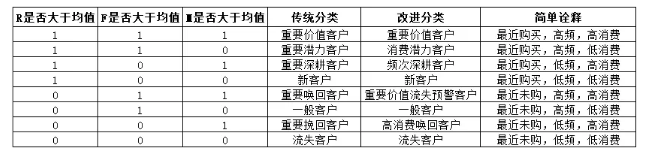

In [128]:
rfm['人群数值']=(rfm['r是否大于均值']*100)+(rfm['f是否大于均值']*10)+(rfm['m是否大于均值']*1)

In [129]:
rfm.head()

,R,total_moner,cust_mane,F,M,r_score,f_score,m_score,r是否大于均值,f是否大于均值,m是否大于均值,人群数值
0,569,2000.0,丁世奇,1,2000.0,2.0,2.0,5.0,0,0,1,1
1,555,5000.0,丁中,1,5000.0,2.0,2.0,5.0,0,0,1,1
2,554,8500.0,丁丹丹,2,4250.0,2.0,2.0,5.0,0,0,1,1
3,562,5000.0,丁丽,1,5000.0,2.0,2.0,5.0,0,0,1,1
4,561,5000.0,丁丽丽,1,5000.0,2.0,2.0,5.0,0,0,1,1


In [140]:
def transform_label(x):
    global label
    if x ==111:
        label='重要价值客户'
    elif x ==110:
        label='消费潜力客户'
    elif x ==100:
        label='新客户'
    elif x ==10:
        label='一般客户'
    elif x ==1:
        label='高消费换回客户'
    elif x ==0:
        label='流失客户'
    return label

In [134]:
print(transform_label(110))

消费潜力客户


In [141]:
rfm['人群类型']=rfm['人群数值'].apply(transform_label)
rfm.head()

,R,total_moner,cust_mane,F,M,r_score,f_score,m_score,r是否大于均值,f是否大于均值,m是否大于均值,人群数值,人群类型
0,569,2000.0,丁世奇,1,2000.0,2.0,2.0,5.0,0,0,1,1,高消费换回客户
1,555,5000.0,丁中,1,5000.0,2.0,2.0,5.0,0,0,1,1,高消费换回客户
2,554,8500.0,丁丹丹,2,4250.0,2.0,2.0,5.0,0,0,1,1,高消费换回客户
3,562,5000.0,丁丽,1,5000.0,2.0,2.0,5.0,0,0,1,1,高消费换回客户
4,561,5000.0,丁丽丽,1,5000.0,2.0,2.0,5.0,0,0,1,1,高消费换回客户


#### 最终结果

In [146]:
count = rfm['人群类型'].value_counts().reset_index()
count.columns=['客户类型','人数']
count['占比']=count['人数']/count['人数'].sum()
count

,客户类型,人数,占比
0,高消费换回客户,22279,0.992339
1,流失客户,171,0.007617
2,一般客户,1,0.000045


In [153]:
rfm['总']=rfm['F']*rfm['M']
mon = rfm.groupby('人群类型')['总'].sum().reset_index()
#mon
mon.columns=['客户类型','总']
mon['占比']=rfm['总']/rfm['总'].sum()
mon

,客户类型,总,占比
0,一般客户,3.000000e+02,0.000013
1,流失客户,3.128358e+05,0.000033
2,高消费换回客户,1.496473e+08,0.000057


In [154]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']


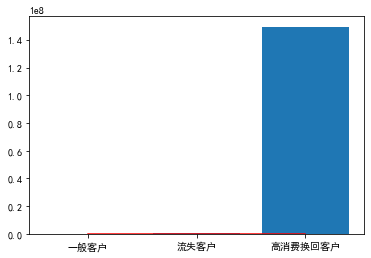

In [158]:

x = mon['客户类型']
y = mon['总']
y1=mon['占比']
plt.bar(x, y,)
plt.plot(x, y1, 'r-')

[]

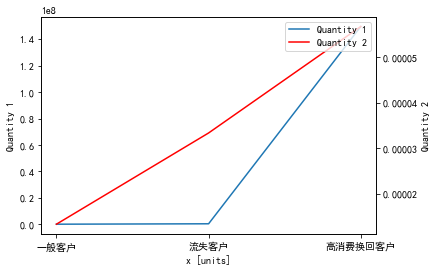

In [164]:
import numpy as np
import matplotlib.pyplot as plt
x = mon['客户类型']
y = mon['总']
y1=mon['占比']
  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, '-', label = 'Quantity 1')
 
ax2 = ax.twinx()
ax2.plot(x,y1, '-r', label = 'Quantity 2')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
 
ax.set_xlabel("x [units]")
ax.set_ylabel(r"Quantity 1")
ax2.set_ylabel(r"Quantity 2")
 
plt.plot()